In [1]:
import scanpy as sc
import anndata as ad
import numpy as np
import pandas as pd

In [2]:
atlas = sc.read_h5ad(f'/home/icb/jonas.flor/gastrulation_atlas/scvi/training/1M/all_genes/2/2048/integrated_adata.h5ad', backed='r')
gast = sc.read_h5ad('/home/icb/jonas.flor/gastrulation_atlas/scvi/reference_query/scarches/1M/all_genes/2/2048/gastrulation/gastrulation_adata.h5ad', backed='r')

In [3]:
gast

AnnData object with n_obs × n_vars = 89267 × 24552 backed at '/home/icb/jonas.flor/gastrulation_atlas/scvi/reference_query/scarches/1M/all_genes/2/2048/gastrulation/gastrulation_adata.h5ad'
    obs: 'day', 'celltype', 'batch', 'dpt_pseudotime'
    uns: 'batch_colors', 'celltype_colors', 'day_colors', 'diffmap_evals', 'iroot', 'log1p', 'neighbors'
    obsm: 'X_diffmap', 'X_emb', 'X_umap'
    layers: 'counts'
    obsp: 'connectivities', 'distances'

In [4]:
atlas

AnnData object with n_obs × n_vars = 1000000 × 24552 backed at '/home/icb/jonas.flor/gastrulation_atlas/scvi/training/1M/all_genes/2/2048/integrated_adata.h5ad'
    obs: 'cell_id', 'keep', 'day', 'embryo_id', 'experimental_batch', 'batch', 'cell_cluster', 'celltype', 'cellcluster_moscot', '_scvi_batch', '_scvi_labels', 'dpt_pseudotime'
    uns: 'diffmap_evals', 'iroot', 'log1p', 'neighbors'
    obsm: 'X_diffmap', 'X_emb'
    obsp: 'connectivities', 'distances'

In [5]:
adata = ad.AnnData(np.empty((atlas.n_obs+gast.n_obs, 10000)))
adata.obs['celltype'] = pd.concat([atlas.obs.cellcluster_moscot, gast.obs.celltype]).values
adata.obs['batch'] = pd.concat([atlas.obs.embryo_id, gast.obs.batch]).values
adata.obs['day'] = pd.concat([atlas.obs.day, gast.obs.day]).values
adata.obs['dataset'] = pd.Categorical(np.array((['atlas'] * atlas.n_obs) + (['query'] * gast.n_obs)))
adata.obsm['X_emb'] = np.concatenate((atlas.obsm['X_emb'], gast.obsm['X_emb']), axis=0)
sc.pp.neighbors(adata, use_rep='X_emb')
sc.tl.umap(adata)

/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pynndescent/pynndescent_.py:346: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style' in a future release. See details at https://numba.readthedocs.io/en/latest/reference/deprecation.html#deprecation-of-old-style-numba-captured-errors
Exception origin:
  File "/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/numba/core/types/functions.py", line 486, in __getnewargs__
    raise ReferenceError("underlying object has vanished")

  init_rp_tree(data, dist, current_graph, leaf_array)
/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/pynndescent/pynndescent_.py:348: NumbaPendingDeprecationWarning: Code using Numba extension API maybe depending on 'old_style' error-capturing, which is deprecated and will be replaced by 'new_style' in a future release. See details at ht

/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


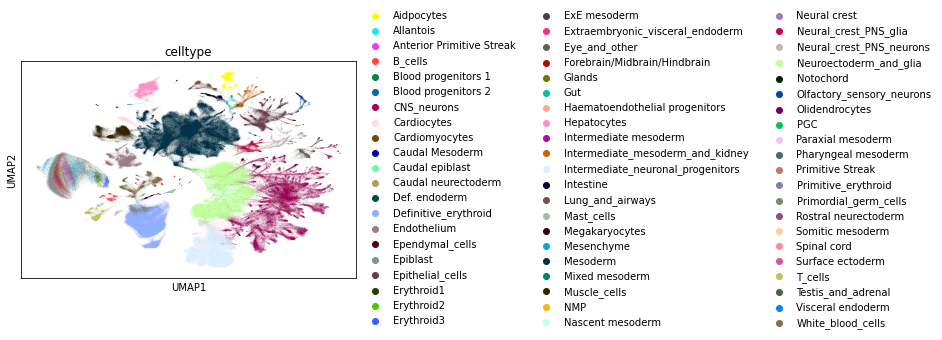

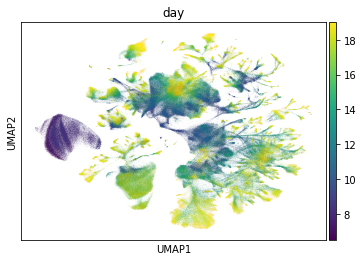

/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


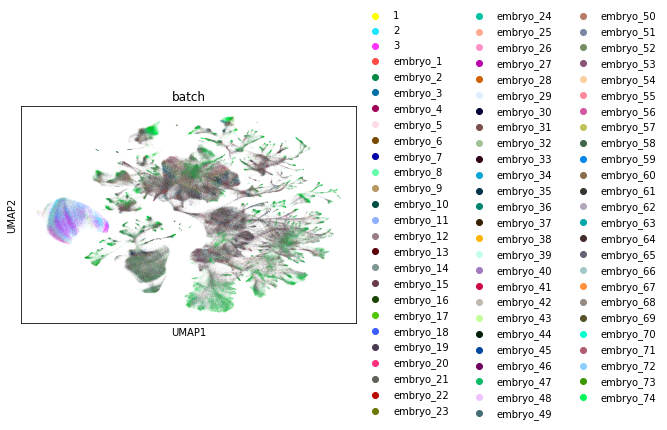

/home/icb/jonas.flor/mambaforge/envs/scvi/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:391: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


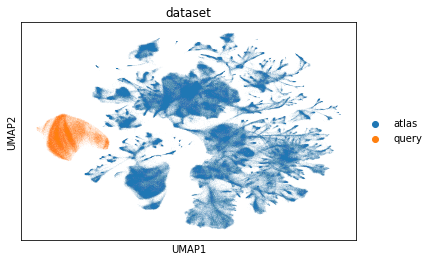

In [6]:
sc.pl.umap(adata, color='celltype', save=f'_gastrulation_all_joint_celltypes.png')
sc.pl.umap(adata, color='day', save=f'_gastrulation_all_joint_day.png')
sc.pl.umap(adata, color='batch', save=f'_gastrulation_all_joint_batch.png')
sc.pl.umap(adata, color='dataset', save=f'_gastrulation_all_joint_dataset.png')